## Imports

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Generate analysis file from case study repo - vLLM

In [2]:
# get git stat from the case study repo
!cd vllm/ && git log --pretty=format:'[%h] %an %ad %s' --date=short --numstat --before=2026-01-26 > /workspaces/UC26_Software_Architecture/assignment1/logs/vllm_evo.log

In [3]:
# summary
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a summary 

# revisions/effort
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a revisions > logs/vllm_freqs.csv 

statistic,value
number-of-commits,13286
number-of-entities,7333
number-of-entities-changed,65642
number-of-authors,1974


In [4]:
# summary 
!cd vllm/ && cloc . 

# complexity 
!cd vllm/ && cloc ./ --unix --by-file --csv --quiet --report-file=../logs/vllm_lines.csv 

    3615 text files.
    3545 unique files.                                          
     156 files ignored.

github.com/AlDanial/cloc v 1.98  T=5.86 s (605.0 files/s, 161087.6 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                        2201         101580          87390         531816
JSON                           501              4              0          74743
CUDA                           145           6579           4628          40703
Markdown                       216           8147              5          21876
C/C++ Header                    68           3293           2082          18573
C++                             25           1342            790           8847
YAML                           174            597            761           8824
Bourne Shell 

In [5]:
# merge data
!python scripts_4/merge_comp_freqs.py logs/vllm_freqs.csv logs/vllm_lines.csv > logs/results.csv

## Load file

In [6]:
# load results.csv to a dataframe
df = pd.read_csv('logs/results.csv')
df.head()

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,.buildkite/test-pipeline.yaml,515,1289
3,vllm/envs.py,379,1109
4,vllm/engine/llm_engine.py,334,2


In [7]:
# limit to the first 50 modules for better visualization
df = df.head(50)

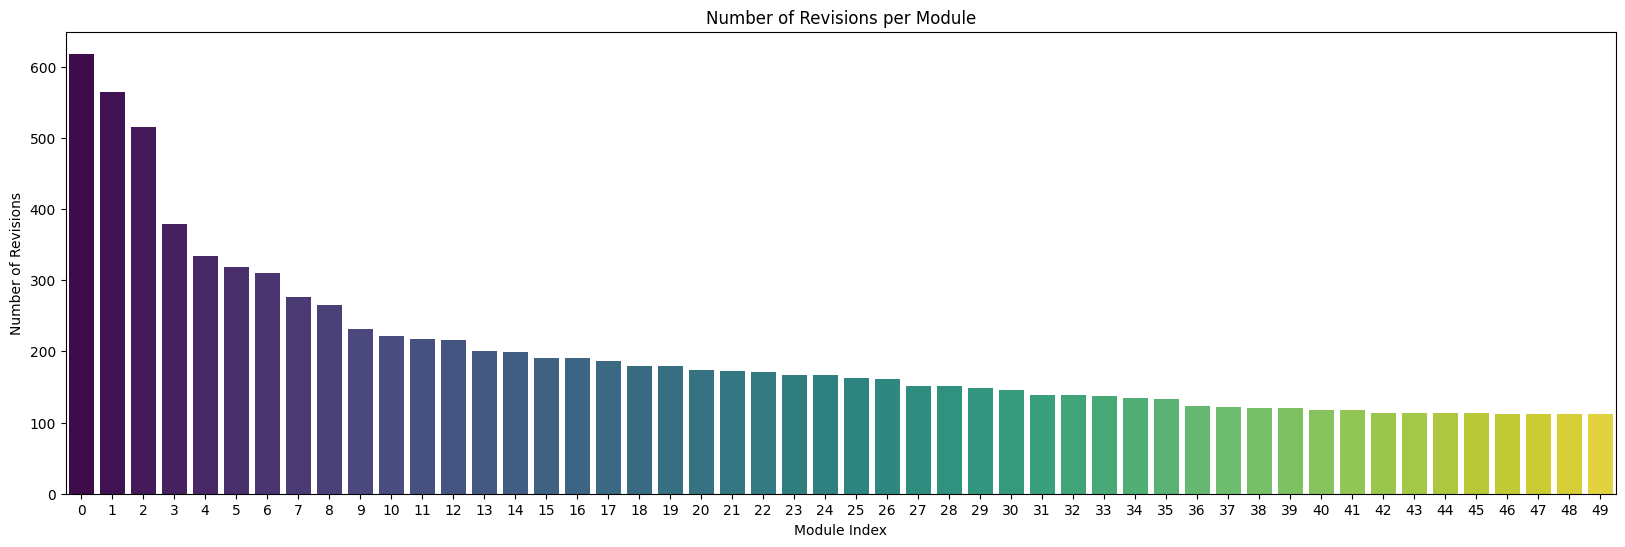

In [8]:
# plot revision over each module
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x=df.index, y='revisions',hue= df.index, palette='viridis', legend=False)
plt.title('Number of Revisions per Module')
plt.xlabel('Module Index')
plt.ylabel('Number of Revisions')
plt.show()

In [9]:
# return the top 20 modules with the highest technical debt
top_td_modules = df.iloc[:20] # already sorted by revisions then LOC
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,.buildkite/test-pipeline.yaml,515,1289
3,vllm/envs.py,379,1109
4,vllm/engine/llm_engine.py,334,2
5,vllm/entrypoints/openai/api_server.py,318,728
6,tests/models/registry.py,310,1018
7,vllm/model_executor/models/registry.py,277,1026
8,vllm/entrypoints/llm.py,265,1082
9,vllm/_custom_ops.py,232,2417


In [10]:
# Remove readme, text file and build files from the analysis
top_td_modules = df[~df['module'].str.contains('README|readme|.txt|.md|build|.yml|.yaml|.json|.xml|.toml', case=False)]
top_td_modules = top_td_modules.reset_index(drop=True)
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,vllm/envs.py,379,1109
3,vllm/engine/llm_engine.py,334,2
4,vllm/entrypoints/openai/api_server.py,318,728
5,tests/models/registry.py,310,1018
6,vllm/model_executor/models/registry.py,277,1026
7,vllm/entrypoints/llm.py,265,1082
8,vllm/_custom_ops.py,232,2417
9,setup.py,221,745


In [11]:
# get top 10 of the refined list
top_td_modules = top_td_modules.iloc[:10]
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,vllm/envs.py,379,1109
3,vllm/engine/llm_engine.py,334,2
4,vllm/entrypoints/openai/api_server.py,318,728
5,tests/models/registry.py,310,1018
6,vllm/model_executor/models/registry.py,277,1026
7,vllm/entrypoints/llm.py,265,1082
8,vllm/_custom_ops.py,232,2417
9,setup.py,221,745


As a result, our top 2 possible TD are:
- `vllm/engine/arg_utils.py`
- `vllm/v1/worker/gpu_model_runner.py`

### Complexity analysis using indentation as metric

- n – total number of lines
- Total – total complexity (indention number)
- Mean and SD – mean and standard deviation (2.42 means each line on average has two indentions)
- Max – largest complexity (indention number)

In [12]:
# complexity analysis on `vllm/engine/arg_utils.py`
!echo "(*) Complexity analysis on vllm/vllm/engine/arg_utils.py"
!python scripts_4/complexity_analysis.py vllm/vllm/engine/arg_utils.py

!echo "---------------------------"

# complexity analysis on `vllm/v1/worker/gpu_model_runner.py`
!echo "(*) Complexity analysis on vllm/v1/worker/gpu_model_runner.py"
!python scripts_4/complexity_analysis.py vllm/vllm/v1/worker/gpu_model_runner.py

(*) Complexity analysis on vllm/vllm/engine/arg_utils.py
n,total,mean,sd,max
1941,4550.0,2.34,1.1,6.0
---------------------------
(*) Complexity analysis on vllm/v1/worker/gpu_model_runner.py
n,total,mean,sd,max
5393,16121.5,2.99,1.29,8.0


In [13]:
# line of code for `vllm/engine/arg_utils.py`
!echo "(*) Lines of Code for vllm/vllm/engine/arg_utils.py"
!cloc vllm/vllm/engine/arg_utils.py

!echo "---------------------------"

# line of code for `vllm/v1/worker/gpu_model_runner.py`
!echo "(*) Lines of Code for vllm/vllm/v1/worker/gpu_model_runner.py"
!cloc vllm/vllm/v1/worker/gpu_model_runner.py

(*) Lines of Code for vllm/vllm/engine/arg_utils.py
       1 text file.
       1 unique file.                              
       0 files ignored.

github.com/AlDanial/cloc v 1.98  T=0.02 s (49.8 files/s, 106023.5 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                           1            187            177           1764
-------------------------------------------------------------------------------
---------------------------
(*) Lines of Code for vllm/vllm/v1/worker/gpu_model_runner.py
       1 text file.
       1 unique file.                              
       0 files ignored.

github.com/AlDanial/cloc v 1.98  T=0.04 s (23.5 files/s, 142548.6 lines/s)
-------------------------------------------------------------------------------
Language                     files

## Complexity from code shape

So we can use this calculate the complexity for a particular revision. But the trends of the complexity is what that is of more interest to us. In a Git Bash Shell: We need to get the hash commits for the pull request for the period of time to dive deeper into this file.

Span from `[18bfcdd05] Cade Daniel 2024-01-21 [Speculative decoding 2/9] Multi-step worker for draft model (#2424)` to `[c25dbee40] Cyrus Leung 2026-01-27 [Model] Bump transformers version for test registry (#33100)`

- START [`18bfcdd05`] Cade Daniel 2024-01-21 [Speculative decoding 2/9] Multi-step worker for draft model (#2424)
- END [`c25dbee40`] Cyrus Leung 2026-01-27 [Model] Bump transformers version for test registry 

In [14]:
# run git complexity trend analysis script
# make sure you are in vllm repo so git command works on the intended repo
!echo "(*) Git Complexity Trend Analysis for vllm/vllm/engine/arg_utils.py"
!cd vllm && python /workspaces/UC26_Software_Architecture/assignment1/scripts_4/git_complexity_trend.py --start "18bfcd" --end "c25dbee" --file "vllm/engine/arg_utils.py" > /workspaces/UC26_Software_Architecture/assignment1/logs/git_complexity_trend_arg_utils.csv

!echo "---------------------------"

!echo "(*) Git Complexity Trend Analysis for v1/worker/gpu_model_runner.py"
!cd vllm && python /workspaces/UC26_Software_Architecture/assignment1/scripts_4/git_complexity_trend.py --start "18bfcd" --end "c25dbee" --file "vllm/v1/worker/gpu_model_runner.py" > /workspaces/UC26_Software_Architecture/assignment1/logs/git_complexity_trend_gpu_model_runner.csv


(*) Git Complexity Trend Analysis for vllm/vllm/engine/arg_utils.py
---------------------------
(*) Git Complexity Trend Analysis for v1/worker/gpu_model_runner.py


### load git_complexity_trend_[...].csv of the 2 modules to analyze code shape

In [15]:
gct_arg_utils_df = pd.read_csv('logs/git_complexity_trend_arg_utils.csv')
gct_arg_utils_df.head()

,rev,n,total,mean,sd
0,9b945daaf,299,1178.25,3.94,2.65
1,380170038,305,1212.50,3.98,2.68
2,9090bf02e,314,1236.50,3.94,2.65
3,96b6f475d,325,1268.00,3.90,2.62
4,786b7f18a,332,1251.50,3.77,2.52


In [16]:
gct_gpu_model_runner_df = pd.read_csv('logs/git_complexity_trend_gpu_model_runner.csv')
gct_gpu_model_runner_df.head()

,rev,n,total,mean,sd
0,6c5af09b3,602,1742.5,2.89,2.26
1,e89379544,599,1728.0,2.88,2.26
2,cea808f32,593,1669.5,2.82,2.16
3,1f1b6d6ed,590,1653.5,2.80,2.10
4,408998555,670,1919.5,2.86,2.17


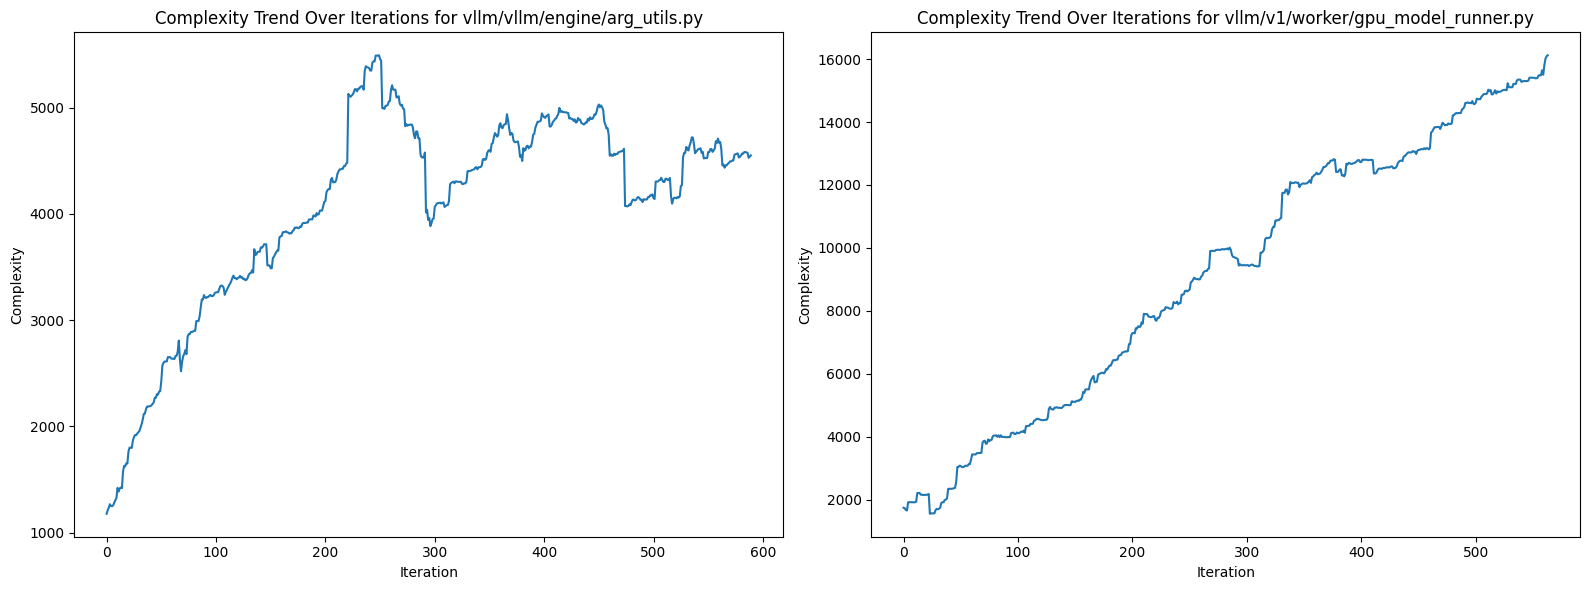

In [17]:
# plot the trend of complexity iteration for both modules on 2 plots side by side on 1 figure for comparison
module_1 = 'vllm/vllm/engine/arg_utils.py'
module_2 = 'vllm/v1/worker/gpu_model_runner.py'

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=gct_arg_utils_df, x=gct_arg_utils_df.index, y='total')
plt.title(f'Complexity Trend Over Iterations for {module_1}')
plt.xlabel('Iteration')
plt.ylabel('Complexity')
plt.subplot(1, 2, 2)
sns.lineplot(data=gct_gpu_model_runner_df, x=gct_gpu_model_runner_df.index, y='total')
plt.title(f'Complexity Trend Over Iterations for {module_2}')
plt.xlabel('Iteration')
plt.ylabel('Complexity')
plt.tight_layout()
plt.show()

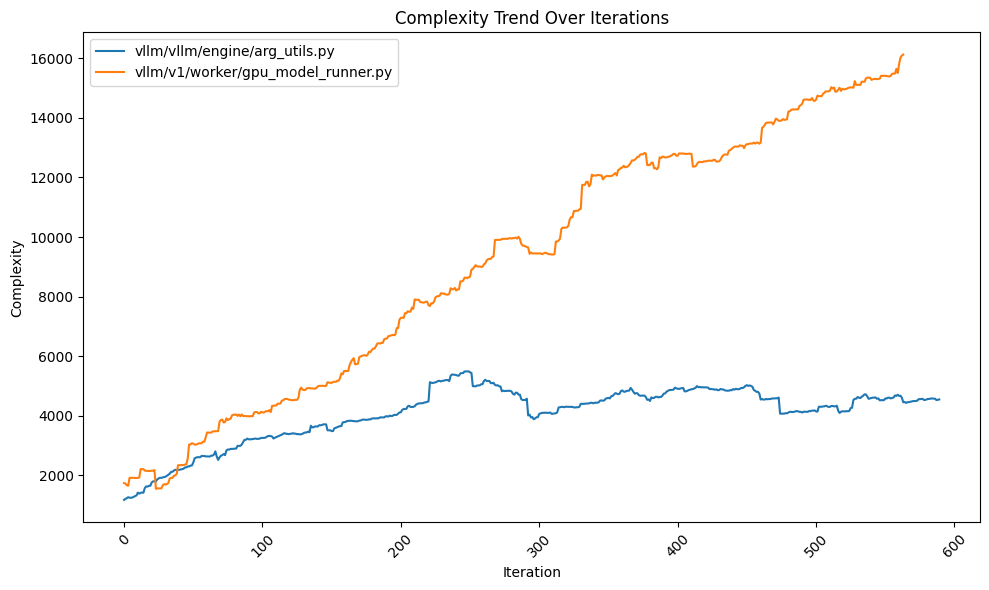

In [18]:
# plot the trend of complexity iteration for both modules on the same plot for comparison
plt.figure(figsize=(10, 6))
sns.lineplot(data=gct_arg_utils_df, x=gct_arg_utils_df.index, y='total', label=module_1)
sns.lineplot(data=gct_gpu_model_runner_df, x=gct_gpu_model_runner_df.index, y='total', label=module_2)
plt.xticks(rotation=45)
plt.title('Complexity Trend Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Complexity')
plt.legend()
plt.tight_layout()
plt.show()

- With this code shape, we can see that the module `arg_utils.py` has gone through 2 code refractors.
- With this code shape, we can see that the module `vllm/v1/worker/gpu_model_runner.py` is deterioating.

## File coupling analysis

### Sum of Coupling 

In [19]:
# get the sum of coupling for each file in the repo
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a soc > logs/vllm_sum_of_coupling.csv

In [20]:
# load sum of coupling data
soc_df = pd.read_csv('logs/vllm_sum_of_coupling.csv')
soc_df.head()

,entity,soc
0,vllm/engine/arg_utils.py,12008
1,vllm/v1/worker/gpu_model_runner.py,11370
2,vllm/config.py,10289
3,vllm/entrypoints/llm.py,9706
4,vllm/model_executor/models/llama.py,9208


In [21]:
# Remove readme, text file and build files from the analysis
top_soc_df = soc_df[~soc_df['entity'].str.contains('README|readme|.txt|.md|build|.yml|.yaml|.json|.xml|.toml', case=False)]
top_soc_df = top_soc_df.reset_index(drop=True)
top_soc_df

,entity,soc
0,vllm/engine/arg_utils.py,12008
1,vllm/v1/worker/gpu_model_runner.py,11370
2,vllm/config.py,10289
3,vllm/entrypoints/llm.py,9706
4,vllm/model_executor/models/llama.py,9208
...,...,...
5111,cacheflow/models/gpt2.py,6
5112,cacheflow/master/policy.py,6
5113,benchmarks/multi_turn/bench_utils.py,6
5114,benchmarks/benchmark_prefix_block_hash.py,6


In [22]:
# get top 5 files with highest sum of coupling
top_soc_df = soc_df.sort_values(by='soc', ascending=False).head(5)
top_soc_df

,entity,soc
0,vllm/engine/arg_utils.py,12008
1,vllm/v1/worker/gpu_model_runner.py,11370
2,vllm/config.py,10289
3,vllm/entrypoints/llm.py,9706
4,vllm/model_executor/models/llama.py,9208


### Coupling

In [23]:
# detail of couplings of each file
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a coupling > logs/vllm_coupling_details.csv

In [24]:
# load coupling details data
coupling_details_df = pd.read_csv('logs/vllm_coupling_details.csv')
coupling_details_df.head()

,entity,coupled,degree,average-revs
0,vllm/lora/layers/logits_processor.py,vllm/lora/layers/vocal_parallel_embedding.py,100,7
1,csrc/attention/paged_attention_v1.cu,csrc/attention/paged_attention_v2.cu,100,7
2,vllm/lora/ops/sgmv_expand.py,vllm/lora/ops/sgmv_expand_slice.py,100,7
3,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/opt.py,100,6
4,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/gpt_neox.py,100,6


In [25]:
# Remove readme, text file and build files from the analysis
top_coupling_details_df = coupling_details_df[~coupling_details_df['entity'].str.contains('README|readme|.txt|.md|build|.yml|.yaml|.json|.xml|.toml', case=False)]
top_coupling_details_df = top_coupling_details_df.reset_index(drop=True)
top_coupling_details_df

,entity,coupled,degree,average-revs
0,vllm/lora/layers/logits_processor.py,vllm/lora/layers/vocal_parallel_embedding.py,100,7
1,csrc/attention/paged_attention_v1.cu,csrc/attention/paged_attention_v2.cu,100,7
2,vllm/lora/ops/sgmv_expand.py,vllm/lora/ops/sgmv_expand_slice.py,100,7
3,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/opt.py,100,6
4,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/gpt_neox.py,100,6
...,...,...,...,...
902,vllm/model_executor/layers/mamba/ops/causal_co...,vllm/model_executor/layers/mamba/ops/mamba_ssm.py,30,17
903,vllm/compilation/fix_functionalization.py,vllm/compilation/fusion.py,30,17
904,vllm/model_executor/layers/mamba/mamba_mixer.py,vllm/model_executor/models/plamo2.py,30,17
905,vllm/v1/structured_output/backend_types.py,vllm/v1/structured_output/backend_xgrammar.py,30,17


In [26]:
# top 20 after removal
top_coupling_details_df = top_coupling_details_df.head(20)
top_coupling_details_df

,entity,coupled,degree,average-revs
0,vllm/lora/layers/logits_processor.py,vllm/lora/layers/vocal_parallel_embedding.py,100,7
1,csrc/attention/paged_attention_v1.cu,csrc/attention/paged_attention_v2.cu,100,7
2,vllm/lora/ops/sgmv_expand.py,vllm/lora/ops/sgmv_expand_slice.py,100,7
3,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/opt.py,100,6
4,cacheflow/model_executor/models/gpt2.py,cacheflow/model_executor/models/gpt_neox.py,100,6
5,cacheflow/model_executor/models/gpt_neox.py,cacheflow/model_executor/models/opt.py,100,6
6,benchmarks/disagg_benchmarks/disagg_overhead_b...,benchmarks/disagg_benchmarks/disagg_performanc...,100,5
7,vllm/lora/ops/bgmv_expand.py,vllm/lora/ops/bgmv_expand_slice.py,100,5
8,examples/online_serving/prithvi_geospatial_mae.py,tests/plugins_tests/test_io_processor_plugins.py,92,7
9,vllm/lora/ops/sgmv_expand_slice.py,vllm/lora/ops/sgmv_shrink.py,92,7
